<a href="https://colab.research.google.com/github/Aaryan10000/ML/blob/main/DS_Practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv("HousingData.csv")
df
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [52]:
df.dropna(axis=0, inplace=True)

In [53]:
df.shape

(394, 14)

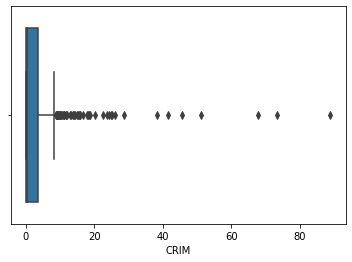

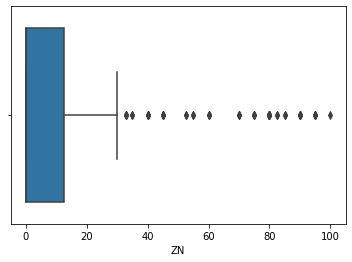

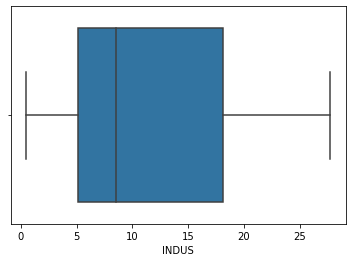

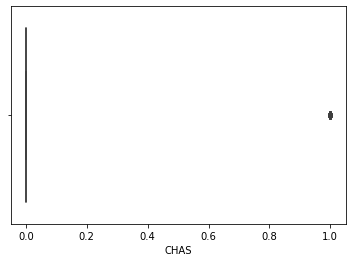

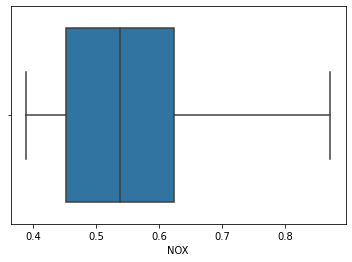

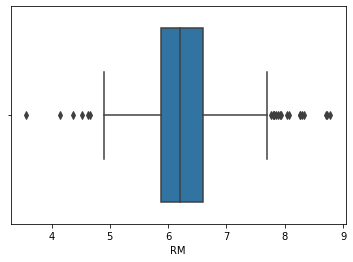

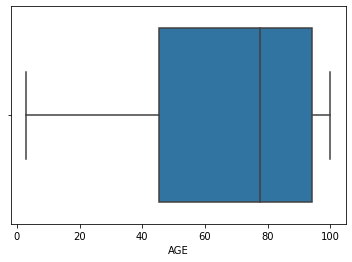

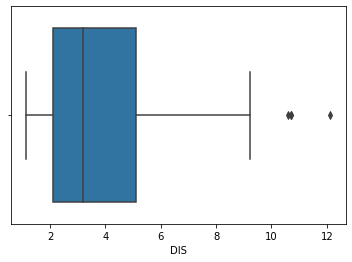

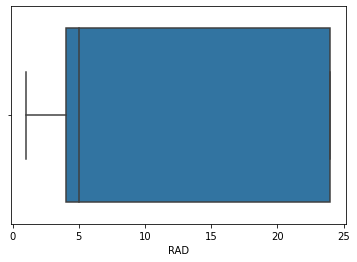

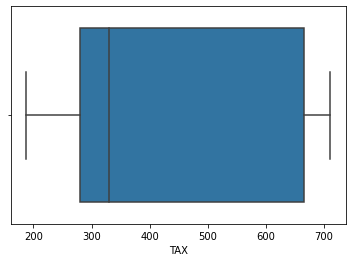

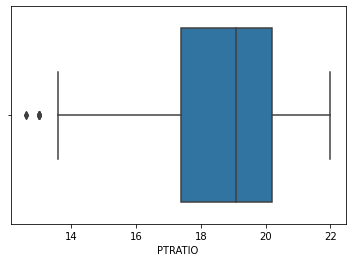

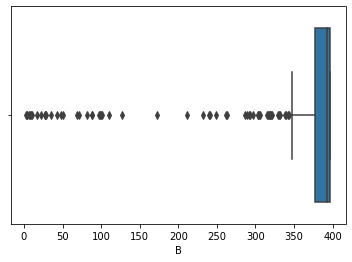

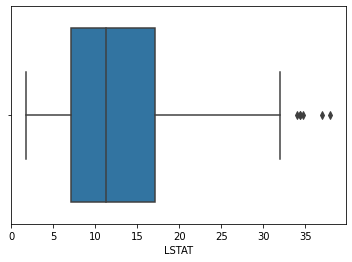

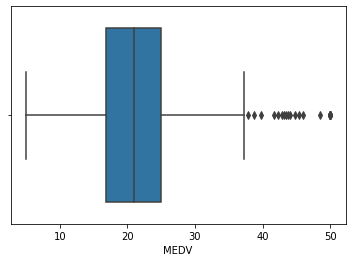

In [54]:
for index, value in enumerate(df.columns):
  pit.figure(index)
  sns.boxplot(df[value])

In [55]:
#df.clear()

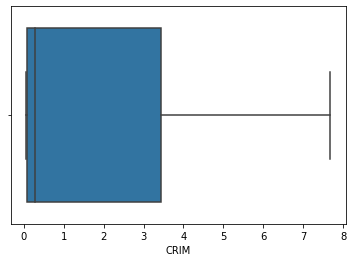

In [56]:
# flooring and capping
lower_bound = df['CRIM'].quantile(0.15)
upper_bound = df['CRIM'].quantile(0.85)

#  lower_bound = df['CRIM'].quantile(0.10)
#  upper_bound = df['CRIM'].quantile(0.90)


df['CRIM'] = np.where(df['CRIM']<lower_bound, lower_bound, df['CRIM'])
df['CRIM'] = np.where(df['CRIM']>upper_bound, upper_bound, df['CRIM'])
sns.boxplot(df['CRIM'])

***EDA***

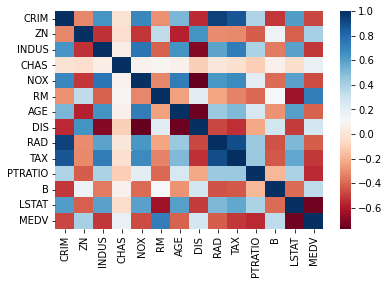

In [57]:
sns.heatmap(df.corr(), cmap='RdBu')

Linear Regression

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [59]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,1.987062,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,2.883804,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.050572,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,7.680385,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [60]:
X = df.drop(['MEDV'], axis=1)
Y = df['MEDV']

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=2)

In [62]:
Lm = LinearRegression()
Lm.fit(X_train, Y_train)

LinearRegression()

In [63]:
Lm.intercept_

33.74486963814555

In [64]:
Lm.coef_

array([-9.98612069e-02,  4.29127236e-02,  1.11590668e-02,  4.41435184e+00,
       -2.08386341e+01,  4.31067529e+00, -1.57673432e-02, -1.44272169e+00,
        2.17369086e-01, -9.01103700e-03, -9.99139065e-01,  1.10658226e-02,
       -3.75855163e-01])

In [65]:
Y_pred = Lm.predict(X_test)
Y_pred

array([21.04559536, 23.02166029, 32.76319321, 11.30321579, 17.66403612,
       20.62765454, 28.42509605, 18.50965133, 35.71091018, 28.2921515 ,
       28.84387216, 27.06143364, 24.06478491, 33.48352321, 25.61805128,
       32.48301993, 22.76809246, 21.4195638 , 24.85351968, 30.18975172,
       10.44857826, 20.17747889, 32.46565519, 26.48837326, 24.89931844,
       42.76245056, 15.61324682, 34.33939203, 18.95894316,  6.33987045,
       30.59500076, 17.20224304, 19.23293087, 31.86686156, 20.02781036,
       14.04106586, 27.62277935, 22.6762388 , 10.36518066, 12.91122989,
       22.66010002, 24.50140304, 21.42674452, 19.17849259, 30.48930597,
        7.74833757, 27.6514653 , 27.57334377, 18.62983593, 33.88237084,
       27.32069811, 34.81946073, 26.71793366, 10.44651653, 28.33908315,
       26.63827409, 32.76483751, 14.7248557 , 16.06711335, 14.0131652 ,
       32.98152552, 16.30773699, 22.14769162, 33.19025   , 29.74212723,
       34.1868316 , 17.3242905 , 16.63900127, 26.07608371, 17.18

In [66]:
mse(Y_test, Y_pred)

17.067637442066694

In [67]:
# 1/2N sigma(n,i=1)-> (yi-)

In [68]:
r2_score(Y_test, Y_pred)

0.8013156280053657

In [69]:
comp = {'Actual Value':Y_test, 'Predicted Value':Y_pred}
df1 = pd.DataFrame(comp)
df1

,Actual Value,Predicted Value
110,21.7,21.045595
38,24.7,23.021660
284,32.2,32.763193
404,8.5,11.303216
452,16.1,17.664036
...,...,...
352,18.6,17.682152
360,25.0,20.256453
117,19.2,23.252263
250,24.4,24.477879
